In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(14.7,10.27)}, style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Atlas of MS Data Export(2).csv')
df.head()

,Country,Number of people with MS,Female/male ratio,Prevalence of MS,Incidence of MS,Mean age of onset,% Sensory,% Visual,% Balance,% Motor,...,Visual,Urinary,Balance,Sexual dysfunction,Motor,Fatigue,Cognitive and/or behavioral,% Government,% Out-of- pocket,% Insurance
0,Albania,658,1.82,22,NOT KNOWN,NOT KNOWN,30,5,10,40,...,Visual,Urinary,Balance,Sexual dysfunction,Motor,Fatigue,Cognitive and/or behavioral,60,40,0
1,Algeria,7000,1.8,20,NOT KNOWN,NOT KNOWN,35,24,50,70,...,Visual,Urinary,Balance,Sexual dysfunction,Motor,Fatigue,Cognitive and/or behavioral,NaN,NaN,NaN
2,Argentina,8000,1.66,18,1,33,10,20,25,30,...,NaN,Urinary,Balance,Sexual dysfunction,Motor,Fatigue,NaN,25,15,60
3,Armenia,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,...,Visual,Urinary,NaN,Sexual dysfunction,Motor,NaN,Cognitive and/or behavioral,NaN,NaN,NaN
4,Australia,21283,2.06,95.6,3.8,37.6,NOT KNOWN,27.8,NOT KNOWN,NOT KNOWN,...,Visual,Urinary,Balance,Sexual dysfunction,Motor,Fatigue,Cognitive and/or behavioral,90,10,0


In [3]:
df.columns

Index(['Country', 'Number of people with MS', 'Female/male ratio',
       'Prevalence of MS', 'Incidence of MS', 'Mean age of onset', '% Sensory',
       '% Visual', '% Balance', '% Motor', '% Cognitive and/or behavioral',
       '% Pain', '% Urinary', '% Sexual dysfunction', '% Fatigue', 'Sensory',
       'Pain', 'Visual', 'Urinary', 'Balance', 'Sexual dysfunction', 'Motor',
       'Fatigue', 'Cognitive and/or behavioral', '% Government',
       '% Out-of- pocket', '% Insurance'],
      dtype='object')

In [4]:
df.shape

(106, 27)

## Important information

In [163]:
age = df[['Country', 'Number of people with MS', 'Female/male ratio', 'Prevalence of MS', 'Incidence of MS', 
          'Mean age of onset']]
age.head()

,Country,Number of people with MS,Female/male ratio,Prevalence of MS,Incidence of MS,Mean age of onset
0,Albania,658,1.82,22,NOT KNOWN,NOT KNOWN
1,Algeria,7000,1.8,20,NOT KNOWN,NOT KNOWN
2,Argentina,8000,1.66,18,1,33
3,Armenia,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN
4,Australia,21283,2.06,95.6,3.8,37.6


In [164]:
age['Mean age of onset'].unique()

array(['NOT KNOWN', '33', '37.6', '32.5', '30', '28.2', '31', '37.75',
       '20', '35', '32', '31.9', '34.1', nan, '28', '44', '31.7', '29.4',
       '31.4', '27', '29', '26', '29.3', '26.5', '28.3', '34', '25', '22',
       '40', '29.5', '34.9', '33.2', '26.6'], dtype=object)

In [165]:
age = age.fillna(-1)
clean = {'NOT KNOWN': -1}
for i in age.columns.values:
    age[i] = age[i].replace(clean)


In [166]:
age[['Number of people with MS','Female/male ratio','Prevalence of MS', 'Incidence of MS','Mean age of onset']] = age[['Number of people with MS','Female/male ratio','Prevalence of MS', 'Incidence of MS','Mean age of onset']].astype(float)

In [167]:
age.head()

,Country,Number of people with MS,Female/male ratio,Prevalence of MS,Incidence of MS,Mean age of onset
0,Albania,658.0,1.82,22.0,-1.0,-1.0
1,Algeria,7000.0,1.80,20.0,-1.0,-1.0
2,Argentina,8000.0,1.66,18.0,1.0,33.0
3,Armenia,-1.0,-1.00,-1.0,-1.0,-1.0
4,Australia,21283.0,2.06,95.6,3.8,37.6


In [168]:
age[['Number of people with MS', 'Female/male ratio', 'Prevalence of MS', 'Incidence of MS', 'Mean age of onset']]= age[['Number of people with MS', 'Female/male ratio', 'Prevalence of MS', 'Incidence of MS','Mean age of onset']].astype(float)

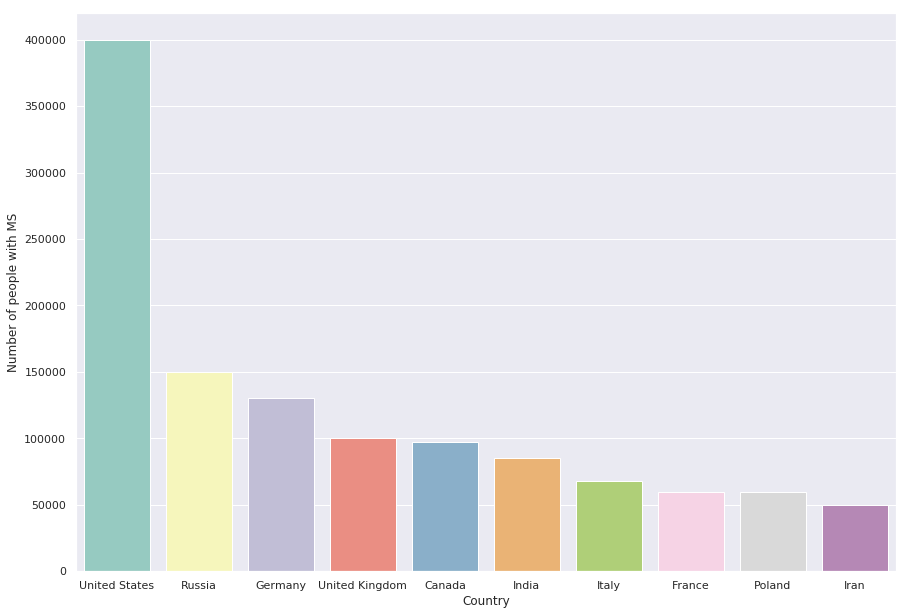

In [169]:
age1 = age.sort_values(by=['Number of people with MS'], ascending=False).head(10)

sns.barplot(x='Country', y='Number of people with MS', palette="Set3",data=age1)

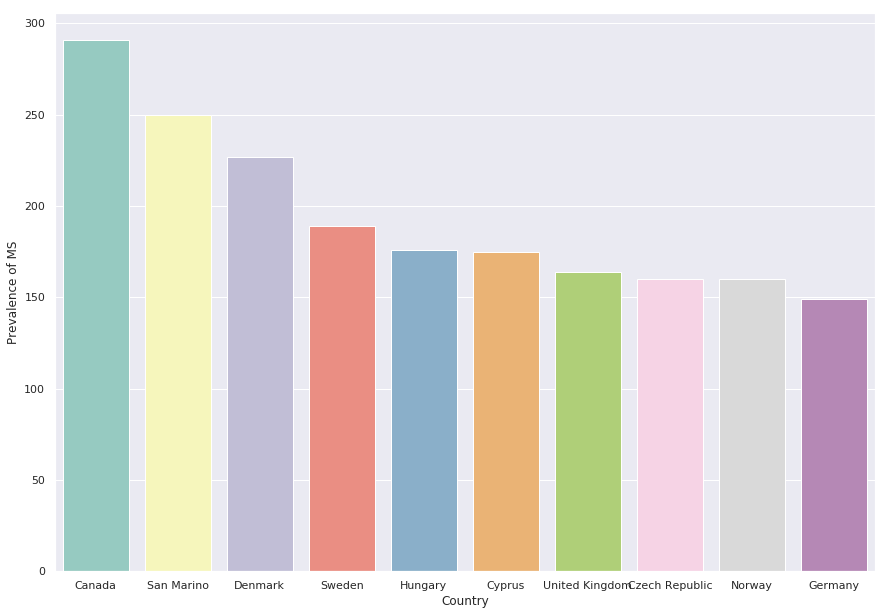

In [170]:
age2 = age.sort_values(by=['Prevalence of MS'], ascending=False).head(10)

sns.barplot(x='Country', y='Prevalence of MS', palette="Set3",data=age2)

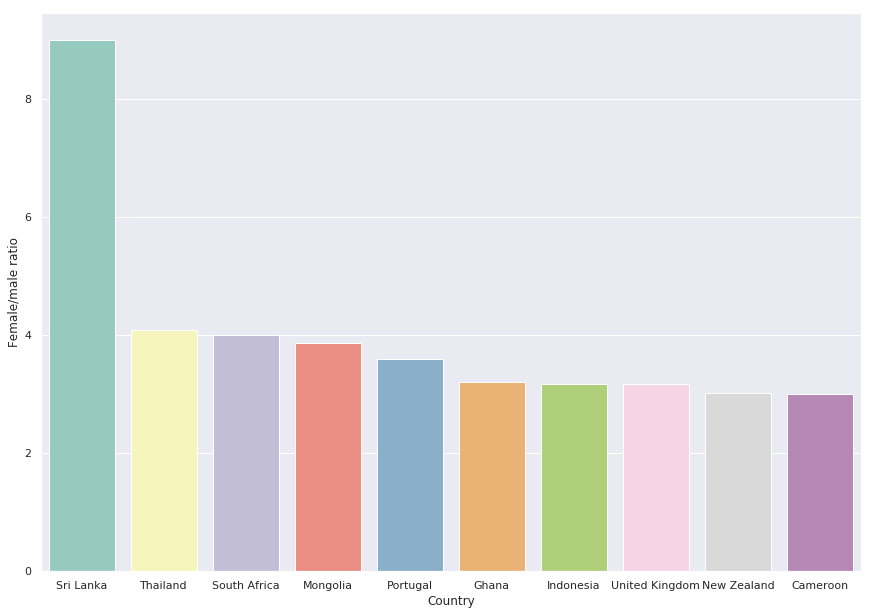

In [171]:
age3 = age.sort_values(by=['Female/male ratio'], ascending=False).head(10)

sns.barplot(x='Country', y='Female/male ratio', palette="Set3",data=age3)

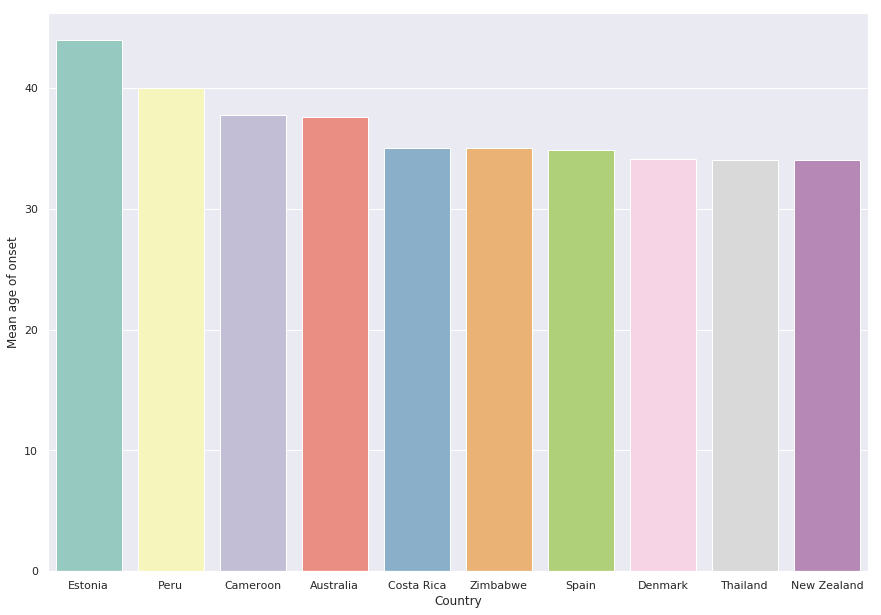

In [172]:
age4 = age.sort_values(by=['Mean age of onset'], ascending=False).head(10)

sns.barplot(x='Country', y='Mean age of onset', palette="Set3",data=age4)

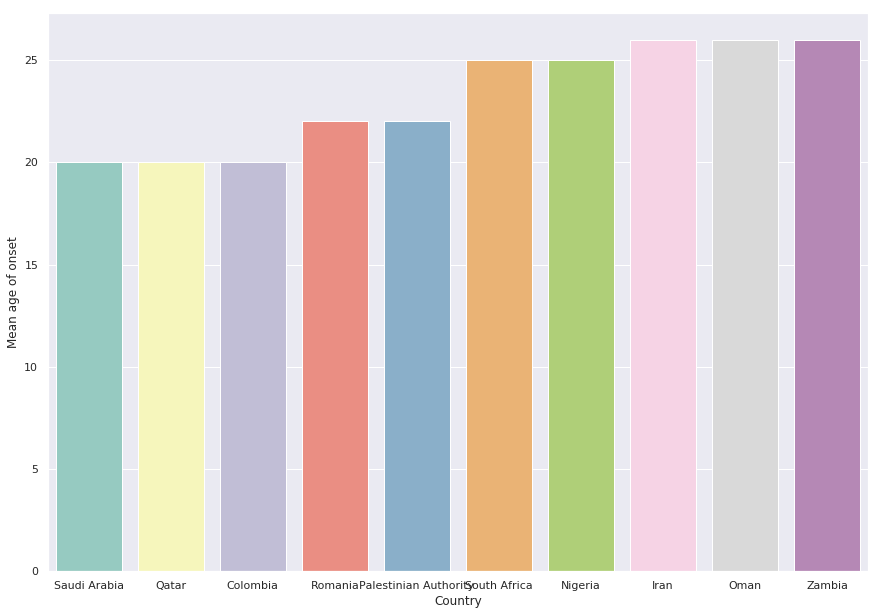

In [175]:
age5 = age.loc[age['Mean age of onset'] > 0].sort_values(by=['Mean age of onset']).head(10)

sns.barplot(x='Country', y='Mean age of onset', palette="Set3",data=age5)

## Symptoms of MS

In [21]:
symptoms = df[['Country', '% Sensory', '% Visual', '% Balance', '% Motor', '% Cognitive and/or behavioral', '% Pain', 
               '% Urinary', '% Sexual dysfunction', '% Fatigue']]
symptoms.head()

,Country,% Sensory,% Visual,% Balance,% Motor,% Cognitive and/or behavioral,% Pain,% Urinary,% Sexual dysfunction,% Fatigue
0,Albania,30,5,10,40,10,10,5,5,30
1,Algeria,35,24,50,70,3,11,17,NOT KNOWN,3
2,Argentina,10,20,25,30,10,24,45,32,65
3,Armenia,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN
4,Australia,NOT KNOWN,27.8,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN,NOT KNOWN


In [22]:
symptoms = symptoms.fillna(-1)
clean = {'NOT KNOWN': -1}
for i in symptoms.columns.values:
    symptoms[i] = symptoms[i].replace(clean)

In [23]:
symptoms.head()

,Country,% Sensory,% Visual,% Balance,% Motor,% Cognitive and/or behavioral,% Pain,% Urinary,% Sexual dysfunction,% Fatigue
0,Albania,30,5,10,40,10,10,5,5,30
1,Algeria,35,24,50,70,3,11,17,-1,3
2,Argentina,10,20,25,30,10,24,45,32,65
3,Armenia,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,Australia,-1,27.8,-1,-1,-1,-1,-1,-1,-1


In [24]:
symptoms.columns

Index(['Country', '% Sensory', '% Visual', '% Balance', '% Motor',
       '% Cognitive and/or behavioral', '% Pain', '% Urinary',
       '% Sexual dysfunction', '% Fatigue'],
      dtype='object')

In [25]:
symptoms[['% Sensory', '% Visual', '% Balance', '% Motor', '% Cognitive and/or behavioral', '% Pain', '% Urinary', '% Sexual dysfunction', '% Fatigue']] = symptoms[['% Sensory', '% Visual', '% Balance', '% Motor', '% Cognitive and/or behavioral', '% Pain', '% Urinary', '% Sexual dysfunction', '% Fatigue']].astype(float)

In [55]:
symptoms.Country.unique()

array(['Albania', 'Algeria', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cameroon',
       'Canada', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kenya',
       'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Malawi', 'Malaysia', 'Malta', 'Mexico',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway',
       'Oman', 'Pakistan', 'Palestinian Authority', 'Panama', 'P

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce4c6bd2b0>],
      dtype=object)

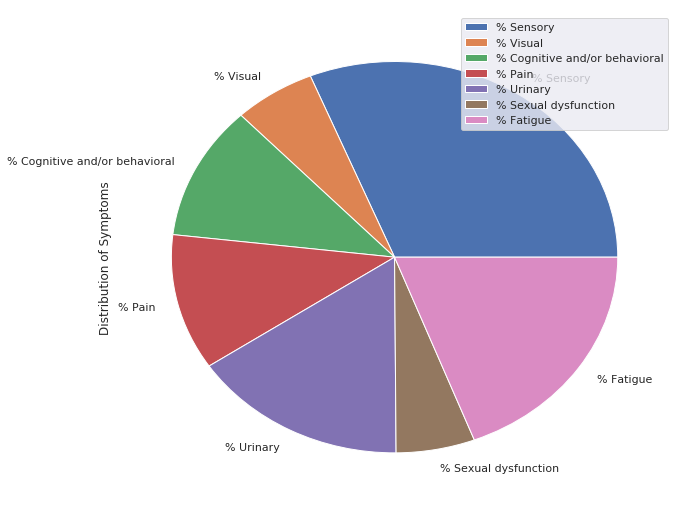

In [85]:
ger = symptoms.loc[symptoms.Country == 'Germany']
ll = []
for i in ger.values[0][1:]:
    if i > 0:
        ll.append(i)
symptoms1 = pd.DataFrame(data=ll, columns = ['Distribution of Symptoms'])
labels = ['% Sensory', '% Visual', '% Cognitive and/or behavioral', '% Pain', '% Urinary', '% Sexual dysfunction', '% Fatigue']  
symptoms1.plot(kind='pie', subplots=True, figsize=(10, 9), labels=labels)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce4c6454e0>],
      dtype=object)

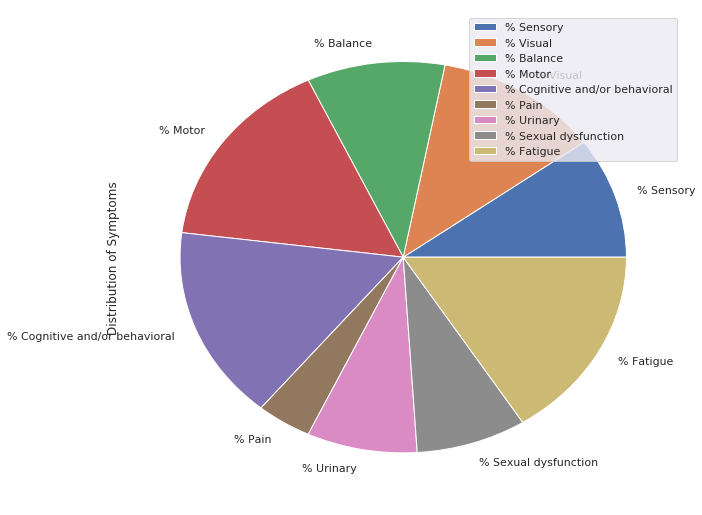

In [91]:
rus = symptoms.loc[symptoms.Country == 'Russia']
symptoms1 = pd.DataFrame(data=rus.values[0][1:], columns = ['Distribution of Symptoms'])
labels = ['% Sensory', '% Visual', '% Balance', '% Motor', '% Cognitive and/or behavioral', '% Pain', '% Urinary', '% Sexual dysfunction', '% Fatigue']  
symptoms1.plot(kind='pie', subplots=True, figsize=(10, 9), labels=labels)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce4c67b908>],
      dtype=object)

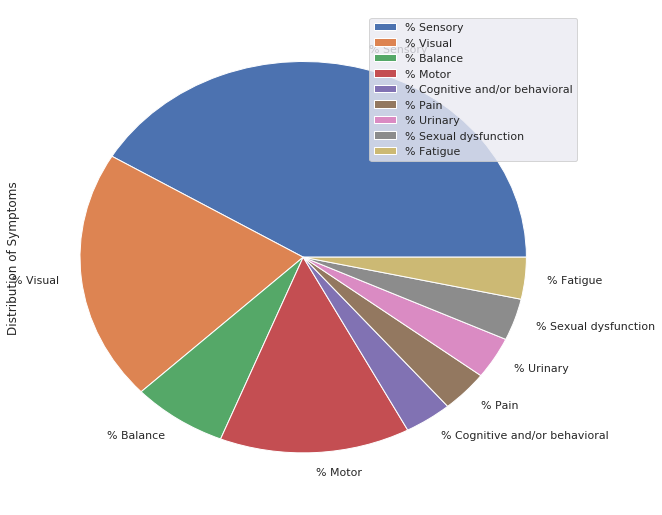

In [89]:
can = symptoms.loc[symptoms.Country == 'Canada']
symptoms1 = pd.DataFrame(data=can.values[0][1:], columns = ['Distribution of Symptoms'])
labels = ['% Sensory', '% Visual', '% Balance', '% Motor', '% Cognitive and/or behavioral', '% Pain', '% Urinary', '% Sexual dysfunction', '% Fatigue']  
symptoms1.plot(kind='pie', subplots=True, figsize=(10, 9), labels=labels)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce4c7066a0>],
      dtype=object)

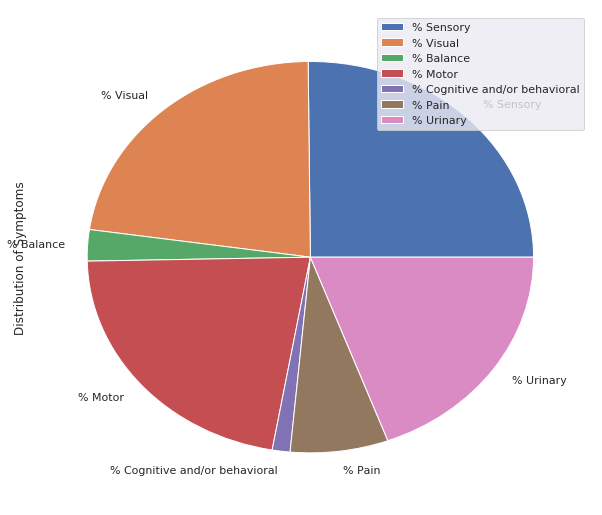

In [84]:
ind = symptoms.loc[symptoms.Country == 'India']
ll = []
for i in ind.values[0][1:]:
    if i > 0:
        ll.append(i)
symptoms1 = pd.DataFrame(data=ll, columns = ['Distribution of Symptoms'])
labels = ['% Sensory', '% Visual', '% Balance', '% Motor', '% Cognitive and/or behavioral', '% Pain', '% Urinary','% Fatigue']  
symptoms1.plot(kind='pie', subplots=True, figsize=(10, 9), labels=labels)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce4c730710>],
      dtype=object)

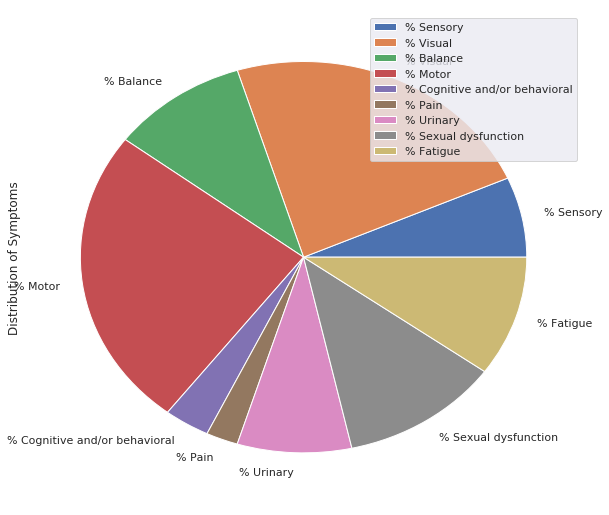

In [75]:
usa = symptoms.loc[symptoms.Country == 'United States']
symptoms1 = pd.DataFrame(data=usa.values[0][1:], columns = ['Distribution of Symptoms'])
labels = ['% Sensory', '% Visual', '% Balance', '% Motor', '% Cognitive and/or behavioral', '% Pain', '% Urinary', '% Sexual dysfunction', '% Fatigue']  
symptoms1.plot(kind='pie', subplots=True, figsize=(10, 9), labels=labels)

#### Availability of Drugs for MS

In [220]:
drugs = df[['Country', 'Sensory', 'Pain', 'Visual', 'Urinary', 'Balance', 'Sexual dysfunction', 'Motor', 'Fatigue',
    'Cognitive and/or behavioral']]
drugs.head()

,Country,Sensory,Pain,Visual,Urinary,Balance,Sexual dysfunction,Motor,Fatigue,Cognitive and/or behavioral
0,Albania,Sensory,Pain,Visual,Urinary,Balance,Sexual dysfunction,Motor,Fatigue,Cognitive and/or behavioral
1,Algeria,Sensory,Pain,Visual,Urinary,Balance,Sexual dysfunction,Motor,Fatigue,Cognitive and/or behavioral
2,Argentina,Sensory,Pain,NaN,Urinary,Balance,Sexual dysfunction,Motor,Fatigue,NaN
3,Armenia,NaN,Pain,Visual,Urinary,NaN,Sexual dysfunction,Motor,NaN,Cognitive and/or behavioral
4,Australia,Sensory,Pain,Visual,Urinary,Balance,Sexual dysfunction,Motor,Fatigue,Cognitive and/or behavioral


In [221]:
#drugs.loc[drugs['Sensory'] == 'Sensory'].head()

In [222]:
def method(row):
    if type(row) == str:
        return 1
    else:
        return 0

for col in drugs.columns.values:
    if col != 'Country':
        drugs[col] = drugs[col].apply(method)

In [223]:
drugs['Cognitive and/or behavioral'].value_counts()

1    79
0    27
Name: Cognitive and/or behavioral, dtype: int64

In [224]:
drugs.head()

,Country,Sensory,Pain,Visual,Urinary,Balance,Sexual dysfunction,Motor,Fatigue,Cognitive and/or behavioral
0,Albania,1,1,1,1,1,1,1,1,1
1,Algeria,1,1,1,1,1,1,1,1,1
2,Argentina,1,1,0,1,1,1,1,1,0
3,Armenia,0,1,1,1,0,1,1,0,1
4,Australia,1,1,1,1,1,1,1,1,1


In [225]:
x = []
temp = 0
for index, row in drugs.iterrows():
    x.append(temp)
    temp = 0
    for a,b in enumerate(row):
        if a:
            temp += b

In [226]:
x.append(8)

In [227]:
x = x[1:]

In [228]:
drugs1 = pd.DataFrame(data=x, columns = ['Availability of drugs'])
drugs = drugs.join(drugs1)

In [229]:
drugs[['Country', 'Availability of drugs']].loc[drugs['Availability of drugs'] > 0].sort_values(by=['Availability of drugs']).head(10)

,Country,Availability of drugs
56,Malawi,2
93,Taiwan,2
68,Nigeria,3
40,Indonesia,3
36,Guinea,3
34,Greece,3
10,Bosnia and Herzegovina,3
20,Cuba,4
19,Croatia,4
104,Zambia,5


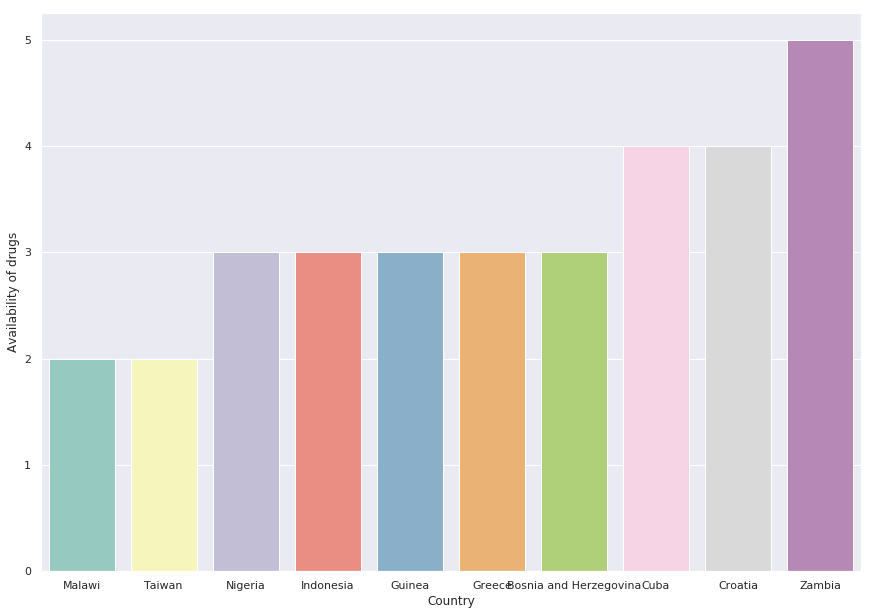

In [230]:
drugs1 = drugs.loc[drugs['Availability of drugs'] > 0].sort_values(by=['Availability of drugs']).head(10)

sns.barplot(x='Country', y='Availability of drugs', palette="Set3",data=drugs1)

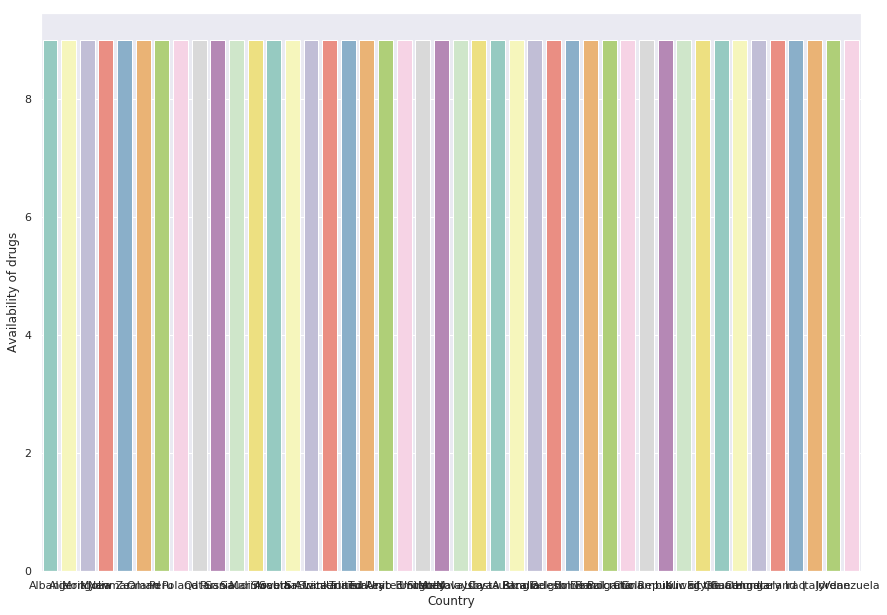

In [235]:
drugs1 = drugs.loc[drugs['Availability of drugs'] == 9].sort_values(by=['Availability of drugs'], ascending=False)

sns.barplot(x='Country', y='Availability of drugs', palette="Set3",data=drugs1)
#drugs.loc[drugs['Availability of drugs'] == 9].sort_values(by=['Availability of drugs'], ascending=False)

#### Source of funding for MS

In [93]:
funds = df[['Country', '% Government', '% Out-of- pocket', '% Insurance']]
funds.head()

,Country,% Government,% Out-of- pocket,% Insurance
0,Albania,60,40,0
1,Algeria,NaN,NaN,NaN
2,Argentina,25,15,60
3,Armenia,NaN,NaN,NaN
4,Australia,90,10,0


In [94]:
funds.dropna().shape

(47, 4)

In [103]:
funds = funds.fillna(-1)
clean = {'NOT KNOWN': -1}
for i in funds.columns.values:
    if i != 'Country':
        funds[i] = funds[i].replace(clean)
funds[['% Government', '% Out-of- pocket', '% Insurance']] = funds[['% Government', '% Out-of- pocket', '% Insurance']].astype(int) 

[10 85 5]


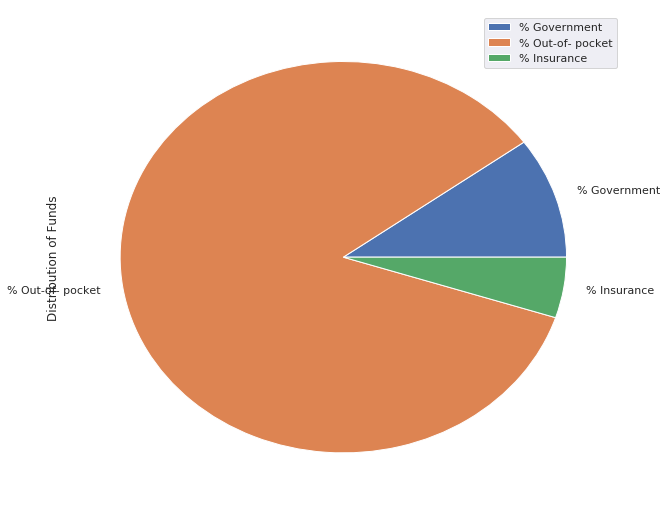

In [236]:
ind = funds.loc[funds.Country == 'India']
funds1 = pd.DataFrame(data=ind.values[0][1:], columns = ['Distribution of Funds'])
labels = ['% Government', '% Out-of- pocket', '% Insurance']
funds1.plot(kind='pie', subplots=True, figsize=(10, 9), labels=labels)
print(ind.values[0][1:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce4c461470>],
      dtype=object)

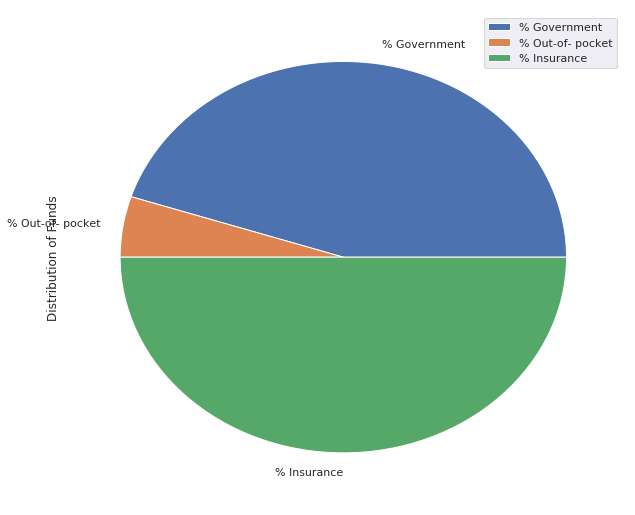

In [113]:
can = funds.loc[funds.Country == 'Canada']
funds1 = pd.DataFrame(data=can.values[0][1:], columns = ['Distribution of Funds'])
labels = ['% Government', '% Out-of- pocket', '% Insurance']
funds1.plot(kind='pie', subplots=True, figsize=(10, 9), labels=labels)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce4c48a4e0>],
      dtype=object)

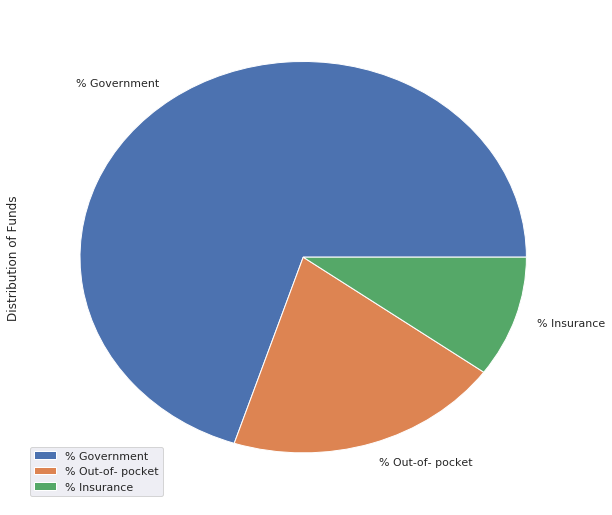

In [111]:
ger = funds.loc[funds.Country == 'Germany']
funds1 = pd.DataFrame(data=ger.values[0][1:], columns = ['Distribution of Funds'])
labels = ['% Government', '% Out-of- pocket', '% Insurance']
funds1.plot(kind='pie', subplots=True, figsize=(10, 9), labels=labels)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce4c2181d0>],
      dtype=object)

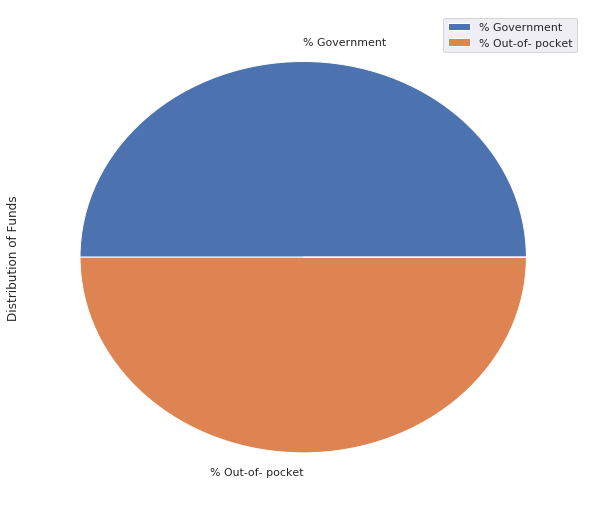

In [142]:
ira = funds.loc[funds.Country == 'Iraq']
funds1 = pd.DataFrame(data=ira.values[0][1:], columns = ['Distribution of Funds'])
labels = ['% Government', '% Out-of- pocket', '% Insurance']
funds1.plot(kind='pie', subplots=True, figsize=(10, 9), labels=labels)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce477b2ac8>],
      dtype=object)

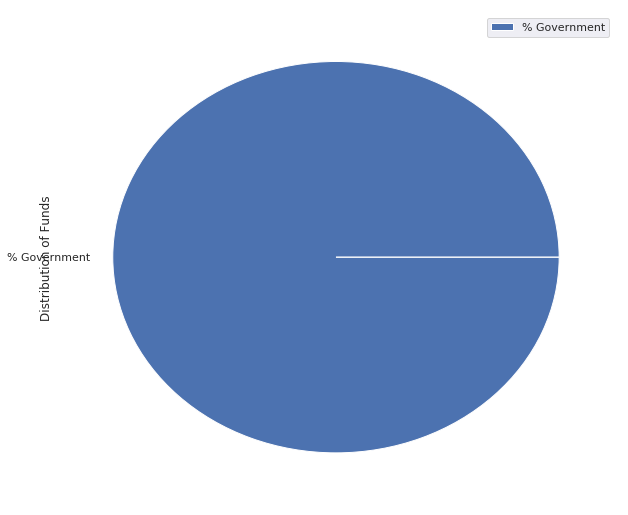

In [237]:
net = funds.loc[funds.Country == 'Netherlands']
funds1 = pd.DataFrame(data=net.values[0][1:], columns = ['Distribution of Funds'])
labels = ['% Government', '% Out-of- pocket', '% Insurance']
funds1.plot(kind='pie', subplots=True, figsize=(10, 9), labels=labels)